# **MediPredict Prediction Test**

> # **Introduction :**

#### In the field of medicine, precise treatment is paramount to ensuring the effective recovery of patients suffering from various illnesses. A critical aspect of achieving this precision lies in understanding how different patients respond to various medications. For this purpose, data analysis and predictive modeling have become valuable tools in modern medical research, aiding in the identification of optimal drug treatments based on individual patient characteristics.

#### In this study, we focus on a dataset comprising patients who suffered from the same illness but exhibited different responses to a range of five medications: Drug A, Drug B, Drug C, Drug X, and Drug Y. Each patient, during their treatment course, responded to one of these medications, making the dataset an invaluable resource for analyzing the correlation between patient characteristics and their drug responses. The primary goal of this study is to leverage this data to build a predictive model that can assist in determining the most appropriate drug for future patients presenting similar conditions.


> # **About Data set :**

#### The dataset includes the following features, each playing a significant role in influencing a patient’s reaction to medication:

- #### **Age :** Age is a crucial factor in medicine as it often determines the dosage and type of drug that can be safely administered. Different age groups may metabolize drugs at varying rates, influencing the effectiveness and side effects of the treatment.

- #### **Sex :** Biological differences between male and female patients can impact how a body processes medications. Hormonal differences and genetic factors can alter a patient's response to a given drug, making sex a key feature in determining suitable medication.

- #### **Blood Pressure (BP) :** Blood pressure levels (e.g., low, normal, high) provide insight into a patient's cardiovascular health. Since certain medications may affect blood pressure, this feature can help ensure that prescribed drugs do not exacerbate any existing conditions related to blood pressure.

- #### **Cholesterol :** Cholesterol levels (e.g., normal, high) also play a significant role in drug selection, particularly for medications that might affect lipid metabolism or have cardiovascular side effects. Understanding a patient's cholesterol levels allows for the consideration of drugs that align with their specific health profile.

- #### **Na_to_K :** typically represents the Sodium-to-Potassium ratio in the blood of a patient. This ratio is derived from the levels of sodium (Na) and potassium (K), two essential electrolytes that play a crucial role in maintaining proper cellular function and fluid balance in the body.

- #### **Target Variable (Drug) :** The target variable in the dataset is the medication to which each patient responded best. This variable takes on five possible values, corresponding to the five drugs (A, B, C, X, Y) included in the study.



> # **Purpose :**


#### This research problem falls under the category of multiclass classification, where the objective is to classify patients into one of multiple classes based on their individual characteristics. Unlike binary classification, which deals with two possible outcomes, multiclass classification must handle more than two categories—in this case, five distinct drug responses. This requires a robust and sophisticated model capable of understanding the intricate relationships between features and their effects on drug efficacy.


#### To solve this problem, we propose using a Decision Tree Classifier, a widely recognized machine learning technique known for its interpretability and effectiveness in handling categorical and numerical data. Decision trees are particularly useful in medical research due to their ability to mimic human decision-making processes, making them transparent and easy to understand. They operate by splitting the dataset into subsets based on feature values, ultimately resulting in a tree-like structure where each leaf node represents a specific class.


#### In this study, the decision tree will be trained using the provided dataset, learning the relationships between patients’ characteristics (age, sex, blood pressure, and cholesterol) and their corresponding drug responses. Once trained, this model can be utilized to predict the most suitable medication for new patients, offering a data-driven approach to drug prescription. By inputting a patient's characteristics into the trained model, medical practitioners can receive recommendations on which drug is likely to be most effective, enhancing the personalization of treatment plans.


#### The application of machine learning models, such as decision trees, in the medical domain presents an opportunity to improve patient outcomes by providing more accurate and tailored treatments. This study aims to contribute to this goal by building a reliable and interpretable model that can guide drug prescription decisions, ultimately optimizing the treatment process and fostering better recovery rates for patients with similar illnesses.


#### In conclusion, this study emphasizes the power of data-driven decision-making in healthcare. By analyzing the relationship between patient characteristics and their responses to various drugs, we aim to develop a model that not only aids in the selection of appropriate medications but also enhances the overall efficiency of the treatment process. With the right predictive tools, healthcare providers can move closer to achieving personalized medicine, where each patient receives the best possible care based on their unique profile.

In [26]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree


> # **Data :**

In [27]:
# Importing data
data=pd.read_csv('/content/Drug result.csv')

In [28]:
# Checking data
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [29]:
# Descrptive stats
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [30]:
# Informative stats
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [31]:
# number of rows and columns
data.shape

(200, 6)

> # **Pre- Processing**


#### To build a predictive model for recommending a suitable drug to patients based on their characteristics, we need to prepare the data appropriately. Our goal is to use a dataset containing information about patients who have all suffered from the same illness but have responded differently to various drugs (e.g., Drug A, Drug B, Drug C, Drug X, Drug Y). To do this, we’ll define two key components from our dataset:

### **Feature Matrix (X) :**

#### A feature matrix contains the input variables or features that we use to predict the target outcome. In this dataset, the features that describe each patient include:

 - #### **Age :** Represents the age of the patient, which can affect how a patient metabolizes and responds to different medications.


 - #### **Sex :** Gender of the patient (e.g., Male or Female), which can influence physiological responses to drugs.


 - #### **BP (Blood Pressure) :** The blood pressure levels (e.g., Low, Normal, High) of the patients, which is crucial when considering cardiovascular effects of medications.

 - #### **Cholesterol :** The cholesterol levels (e.g., Normal, High) of the patients, which can affect drug efficacy and safety.
Na_to_K: The Sodium-to-Potassium ratio in the blood, which reflects electrolyte balance and is important in determining appropriate drug therapy.
These features will help our model understand different patient profiles and their relation to the drug they respond to.


### **Response Vector (y) :**

The response vector represents the target variable or the outcome we are trying to predict. In this context, it refers to the Drug that each patient responded best to during their treatment. The target variable is categorical, meaning it takes on one of several discrete values (Drug A, Drug B, Drug C, Drug X, Drug Y).


## **Steps to Prepare the Data :**

 - #### First, we will extract the features from the dataset to form the feature matrix X.

 - #### Then, we will isolate the target variable (the drug each patient responded to) as the response vector y.

 - #### By defining X and y correctly, we ensure that our model has the input data it needs to learn the relationships between patient characteristics and their corresponding drug responses. This setup allows us to train a machine learning model, such as a decision tree, to predict the best drug for new patients based on their feature data.

In [32]:
feature=data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
feature[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)


#### Although decision trees are conceptually capable of handling categorical data, the implementation in sklearn does not directly accept categorical variables. The decision tree model needs numerical values to perform the mathematical comparisons required to split the data into branches. For example, it cannot directly compare labels like "Male" and "Female" or "Low" and "High" when building splits

> ### **Encoding Categorical Variables :**

#### To address this challenge, we can convert categorical variables into numerical values using a technique known as Label Encoding. Label encoding is the process of assigning a unique numerical value to each category in a categorical variable. This conversion allows the decision tree model to process the data correctly while preserving the meaning of each category.

For example:

- #### **Sex :**
  -  This variable has two categories—"Male" and "Female". With label encoding, we can map "Male" to 0 and "Female" to 1.

- #### **BP (Blood Pressure) :** This variable has three categories—"Low", "Normal", and "High". Using label encoding, we could map these categories as follows:
  - "Low" → 0

  - "Normal" → 1

  - "High" → 2
Benefits

In [33]:
from sklearn import preprocessing
feature_sex = preprocessing.LabelEncoder()
feature_sex.fit(['F','M'])
feature[:,1] = feature_sex.transform(feature[:,1])


feature_BP = preprocessing.LabelEncoder()
feature_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
feature[:,2] = feature_BP.transform(feature[:,2])


feature_Chol = preprocessing.LabelEncoder()
feature_Chol.fit([ 'NORMAL', 'HIGH'])
feature[:,3] = feature_Chol.transform(feature[:,3])

feature[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

> ### **Response data**

In [34]:
response = data["Drug"]
response[0:5]

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


#### In order to evaluate the performance of our decision tree model, we need to split our dataset into training and testing sets. This ensures that we can train the model on one portion of the data and then test its predictive ability on unseen data, which is crucial for assessing its generalization ability. To achieve this, we will use the train_test_split function from the sklearn library.

- #### **Training Set :** The training set is used to train the model. The model learns the patterns, relationships, and decision rules from this subset of the data.


- #### **Testing Set :** The testing set is used to evaluate the model's performance. It allows us to see how well the model performs on data it hasn’t seen before, giving us an estimate of its predictive power.

In [35]:
# Using train test split from sklearn
from sklearn.model_selection import train_test_split

# X_trainset: This subset contains the features of the training set. It is used to train the model.
# X_testset: This subset contains the features of the testing set. It is used to test the model’s predictions.
# y_trainset: This subset contains the target values (drug responses) for the training data.
# y_testset: This subset contains the target values for the testing data, used for evaluating the model’s accuracy.

In [36]:
# train_test_split will return 4 different parameters

# X_trainset, X_testset, y_trainset, y_testset

# The train_test_split taking 80-20 split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(feature, response, test_size=0.2, random_state=3)

#### **Model Training :** X_trainset and y_trainset are used to fit the decision tree model, allowing it to learn patterns in the data.

#### **Model Testing :** X_testset and y_testset are used to evaluate how well the trained model performs on data it hasn’t seen before. This helps in assessing its predictive accuracy and generalization capability.

In [37]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (160, 5) &  Size of Y training set (160,)


> ## **Modeling :**

#### We have create an instance of **DecisionTreeClassifier called drugTree** and specify the criterion as "entropy". The criterion parameter determines the function to measure the quality of a split at each node of the tree.

 #### Criterion="entropy"- Entropy is a measure of the amount of uncertainty or impurity in a dataset. By selecting this criterion, the model will use information gain to decide the best feature and threshold for splitting each node in the decision tree.

In [38]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
# we will fit the data with the training feature matrix X_trainset and training  response vector y_trainset
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

> ## **Prediction :**

#### We have created and configured our decision tree classifier (drugTree), the next step is to use it to make predictions on the testing dataset. We'll use the predict method of the classifier to achieve this.

#### **Making Predictions :**

- To make predictions:

#### We will call the predict method on the drugTree instance, passing in the testing feature set (X_testset).The predictions will be stored in a variable called predTree.


In [40]:
predTree = drugTree.predict(X_testset)

In [41]:
# predTree and y_testset are visually compare the predictions to the actual values.
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [44]:
# Importing accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculating the accuracy of the predictions
accuracy = accuracy_score(y_testset, predTree)

# Displaying the accuracy score
print(f'Accuracy of the model: {accuracy:.2f}')


Accuracy of the model: 1.00


> ## **Visualization :**


#### **Match Requirement :** For a prediction to be considered accurate, every label in the predicted set must correspond exactly to the labels in the true set for that sample.

- #### If the predicted labels match the true labels completely, the accuracy score for that instance is 1.0.

- #### If there is even a slight discrepancy—if any predicted label does not match the true labels—the score for that instance is 0.0.

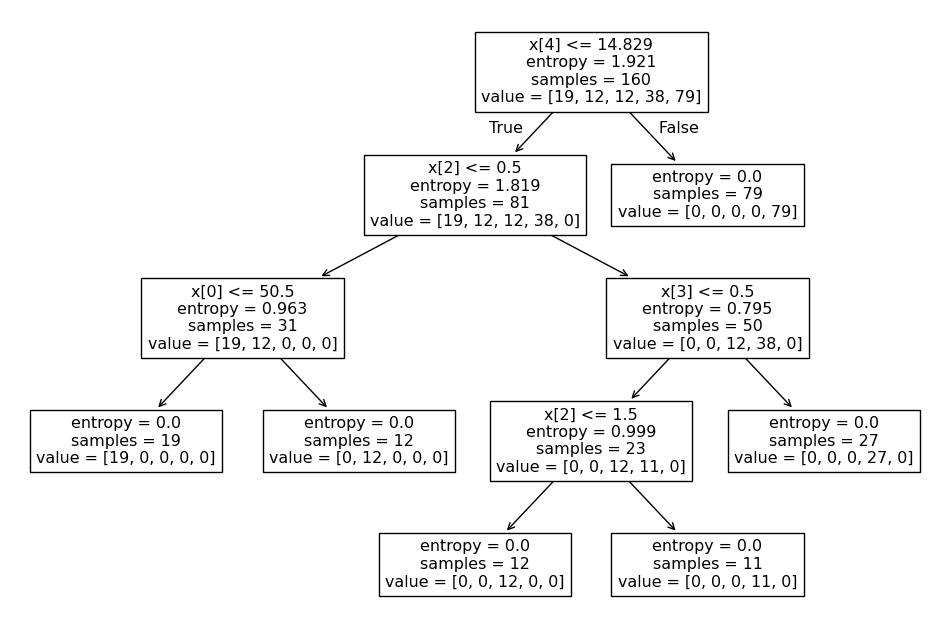

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(drugTree)
plt.show()


# **Insights and Observations :**

- #### **Model Performance**: The accuracy score gave us a straightforward metric to gauge the model's performance. Depending on the obtained accuracy, we can assess the effectiveness of the decision tree in making correct medication predictions.

- #### **Importance of Decision Trees**: Decision trees provide a transparent way of modeling, allowing us to visualize and interpret how decisions are made based on the input features. This is particularly valuable in medical applications where understanding the rationale behind predictions is crucial.

- #### **Potential Improvements**: While our decision tree model serves as a good starting point, there is potential for further improvement. Techniques such as hyperparameter tuning, using ensemble methods (like Random Forests), or exploring other algorithms (like logistic regression or neural networks) could enhance predictive accuracy.

> # **Conclusion :**

#### MediPredict aims to leverage the power of machine learning to support healthcare professionals in making informed medication choices, ultimately leading to improved patient care and treatment outcomes. By harnessing the insights derived from data, we can pave the way for a more data-driven approach to medicine.



#### In conclusion, we have successfully built a decision tree model to predict the appropriate medication for patients suffering from a specific illness based on various features, including age, sex, blood pressure, and cholesterol levels. Here's a summary of the key steps and insights from our analysis:



#### The development of a predictive model for medication response using decision trees highlights the significance of data-driven approaches in healthcare. By continuing to refine and test our models, we can contribute to more effective treatment strategies and better patient outcomes. As we move forward, it will be essential to validate our findings with additional data and consider the broader implications of our predictions in a clinical context.